## Target Encoding ve Test için Ön Hazırlık

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# veride okunamayan karakterleri okutmak için encoding
df = pd.read_csv(r"C:\Users\ASUS\Desktop\Bitirme\1-data_cleaning\clean_data.csv") 

# district için target encoding (price'a göre)
district_mean_price = df.groupby('district')['price'].mean()
df['district_encoded'] = df['district'].map(district_mean_price)

# neighbor için target encoding (price'a göre)
neighbor_mean_price = df.groupby('neighbor')['price'].mean()
df['neighbor_encoded'] = df['neighbor'].map(neighbor_mean_price)

# Mahalle isminden encodingli değere geçiş yapmak için
district_encoding_dict = df.groupby('district')['price'].mean().to_dict()
neighbor_encoding_dict = df.groupby('neighbor')['price'].mean().to_dict()

df = df.drop(columns=["district", "neighbor"])

## Modelleri Oluşturma ve Sonuçları


In [130]:
# Train - Test Datas
x = df.drop(columns=["price"])
y = df["price"]

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score

# Train-test böl
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Modeller
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor()
}

# Her modeli eğit ve test et
results = []
for name, model in models.items():
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    results.append({"Model": name, "MAE": mae, "R2 Score": r2})
    print(f"{name} → MAE: {mae:.2f}, R²: {r2:.4f}")


Linear → MAE: 2768883.18, R²: 0.7094
Ridge → MAE: 2768882.65, R²: 0.7094
Lasso → MAE: 2768883.14, R²: 0.7094
DecisionTree → MAE: 2385684.55, R²: 0.6927
RandomForest → MAE: 1820861.92, R²: 0.8286
GradientBoosting → MAE: 2117671.97, R²: 0.7979


## Sonuçları Göreselleştirme

In [132]:
results_df = pd.DataFrame(results)
results_df

,Model,MAE,R2 Score
0,Linear,2.768883e+06,0.709432
1,Ridge,2.768883e+06,0.709432
2,Lasso,2.768883e+06,0.709432
3,DecisionTree,2.385685e+06,0.692670
4,RandomForest,1.820862e+06,0.828647
5,GradientBoosting,2.117672e+06,0.797908


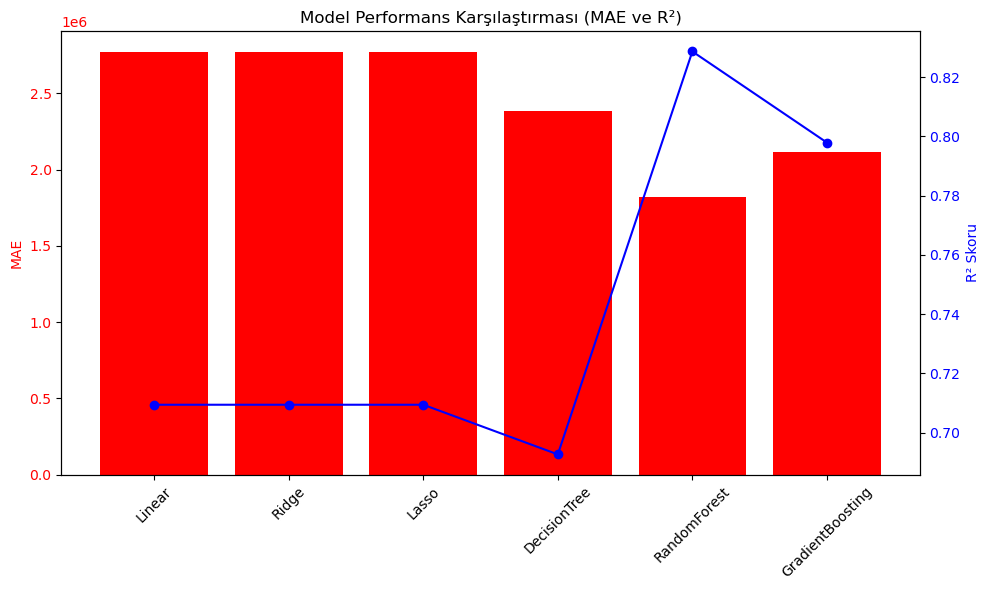

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

# === GÖRSELLEŞTİRME ===
fig, ax1 = plt.subplots(figsize=(10, 6))

# MAE için bar plot
ax1.bar(results_df["Model"], results_df["MAE"], color='red')
ax1.set_ylabel('MAE', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_xticks(range(len(results_df)))
ax1.set_xticklabels(results_df["Model"])
plt.setp(ax1.get_xticklabels(), rotation=45)

# R² için line plot (ikincil eksen)
ax2 = ax1.twinx()
ax2.plot(results_df["Model"], results_df["R2 Score"], color='blue', marker='o')
ax2.set_ylabel('R² Skoru', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title("Model Performans Karşılaştırması (MAE ve R²)")
fig.tight_layout()
plt.show()